# Notebook setup

In [1]:
from IPython.display import clear_output

Uncomment and run the cell below if you are in a Google Colab environment. It will:

1. Mount google drive. You will be asked to authenticate and give permissions.
2. Change directory to google drive.
3. Make a directory "hamilton-tutorials"
4. Change directory to it.
5. Clone this repository to your google drive
6. Move your current directory to the example
7. Install requirements.
8. This means that any modifications will be saved, and you won't lose them if you close your browser.

In [2]:
## 1. Mount google drive
# from google.colab import drive
# drive.mount('/content/drive')
## 2. Change directory to google drive.
# %cd /content/drive/MyDrive
## 3. Make a directory "hamilton-tutorials"
# !mkdir hamilton-tutorials
## 4. Change directory to it.
# %cd hamilton-tutorials
## 5. Clone this repository to your google drive
# !git clone https://github.com/DAGWorks-Inc/hamilton-tutorials/
## 6. Move your current directory to the example
# %cd hamilton-tutorials/2023-08-08/credit_card_approval
## 7. Install requirements.
# %pip install -r requirements.txt
# clear_output()  # optionally clear outputs
# To check your current working directory you can type `!pwd` in a cell and run it.

# Imports

In [3]:
import numpy as np
import pandas as pd
from hamilton import driver, base
from IPython.display import display

import data_cleaning
import features
import model_training

# Use autoreload to automatically reload our function modules
%load_ext autoreload
%autoreload 1
%aimport data_cleaning, features, model_training

# Hamilton Driver

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


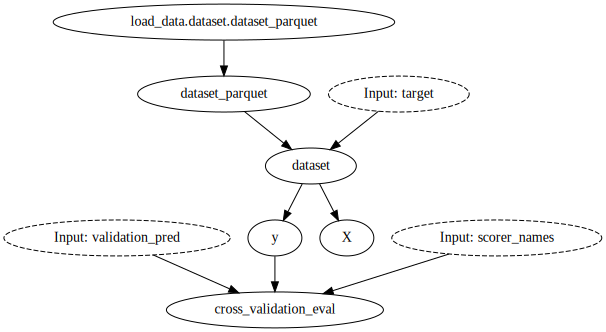

In [4]:
driver_config = {}  # changing the config will alter the visualization
dr = driver.Driver(
    driver_config,
    model_training,  # change the module to visualize
)
dr.display_all_functions(None)

It appears no Pandas index type was detected (ignore this warning if you're using DASK for now.) Please check whether the dataframe created matches what what you expect to happen.


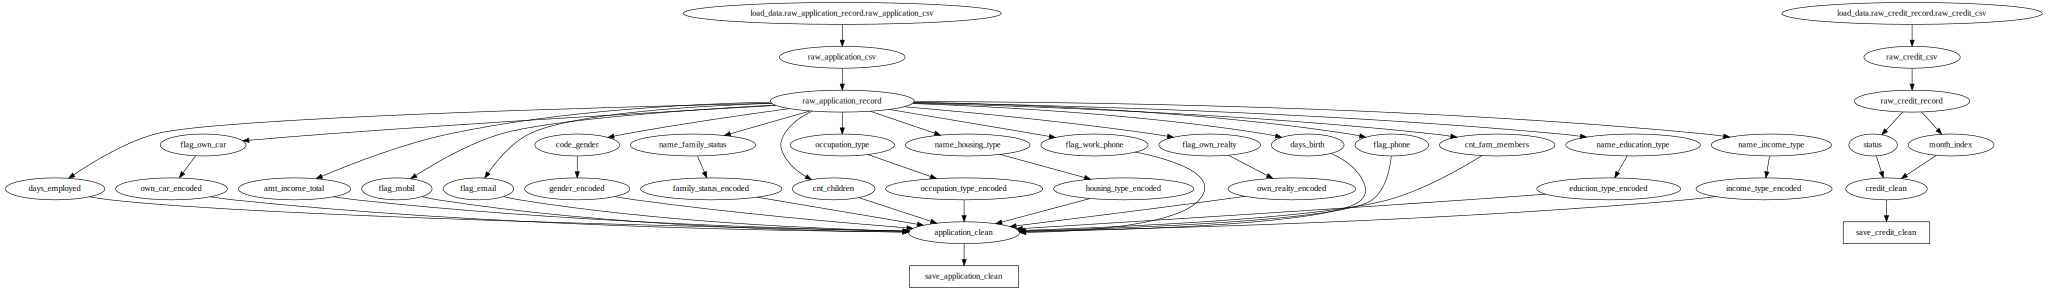

In [5]:
driver_config = dict()
dr = driver.Driver(driver_config, data_cleaning)

requested_outputs = ["save_application_clean", "save_credit_clean"]
inputs = dict()

results = dr.execute(requested_outputs, inputs=inputs)

display(
    dr.visualize_execution(requested_outputs, None, inputs),
)

,preprocessed_dataset.eduction_type_encoded,preprocessed_dataset.family_status_encoded,preprocessed_dataset.housing_type_encoded,preprocessed_dataset.income_type_encoded,preprocessed_dataset.occupation_type_encoded,preprocessed_dataset.own_car_encoded,preprocessed_dataset.own_realty_encoded,preprocessed_dataset.number_of_credit_months,preprocessed_dataset.age_binned,preprocessed_dataset.income_percentile,preprocessed_dataset.has_children,preprocessed_dataset.salary_percentile,preprocessed_dataset.years_employed,preprocessed_dataset.cnt_fam_members,preprocessed_dataset.days_due_mean,preprocessed_dataset.days_due_std,save_preprocessed_dataset
5008804,3.0,2.0,1.0,1.0,0.0,1.0,1.0,15.0,1.0,36.0,0.0,0.0,12.0,2.0,3.125000,12.093387,NaN
5008805,3.0,2.0,1.0,1.0,0.0,1.0,1.0,14.0,1.0,36.0,0.0,0.0,12.0,2.0,3.333333,12.488090,NaN
5008806,1.0,1.0,4.0,1.0,10.0,1.0,1.0,29.0,3.0,9.0,0.0,14.0,3.0,2.0,-1.833333,10.295909,NaN
5008808,1.0,0.0,4.0,2.0,3.0,0.0,1.0,4.0,3.0,29.0,0.0,35.0,8.0,1.0,0.000000,13.693064,NaN
5008809,1.0,0.0,4.0,2.0,3.0,0.0,1.0,4.0,3.0,29.0,0.0,39.0,8.0,1.0,-10.000000,0.000000,NaN


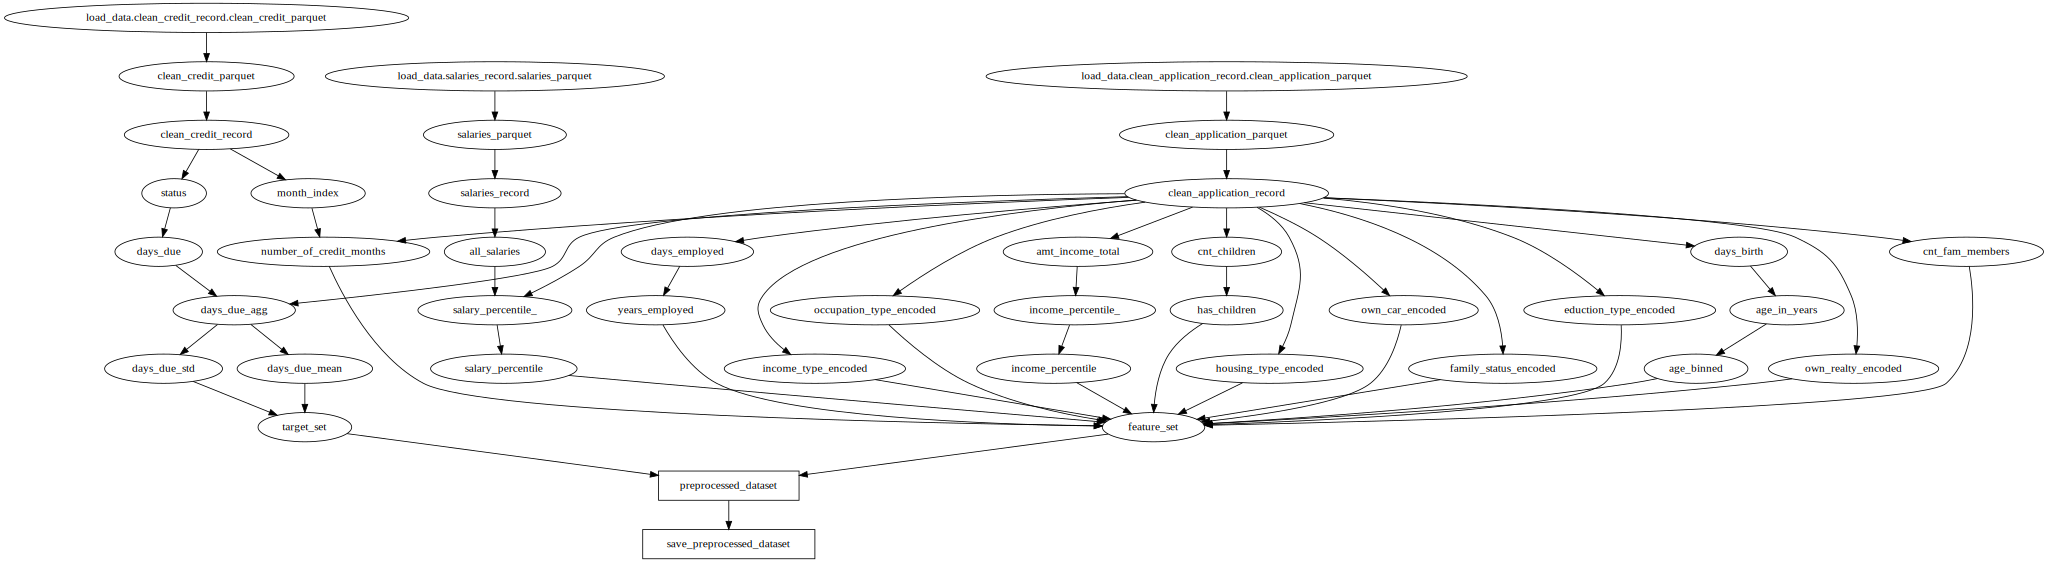

In [6]:
driver_config = dict()
dr = driver.Driver(driver_config, features)

requested_outputs = ["preprocessed_dataset", "save_preprocessed_dataset"]

inputs = dict()

results = dr.execute(requested_outputs, inputs=inputs)

# NOTE because we requested `preprocessed_dataset` and `save_preprocessed_dataset`
# it will create an extra column in the `results` output, but it won't appear in the
# actual dataframe saved by `save_preprocessed_dataset`
display(
    results.head(),
    dr.visualize_execution(requested_outputs, None, inputs),
)

dict_keys(['cross_validation_eval', 'save_trained_model'])

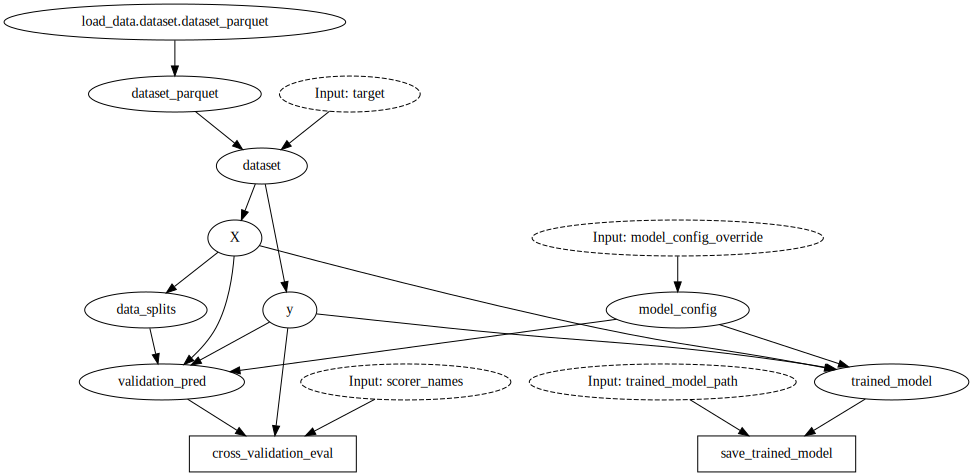

In [8]:
# notice that we are specifying a config
# if you change the config, the visualization will change accordingly
driver_config = dict(
    target="days_due_mean",
    splits_method="users",
    model_type="xgboost",
    scorer_names=["neg_root_mean_squared_error", "r2"],
    trained_model_path=f"./models/xgboost_days_due_mean.json"
)

# the driver is defined with an `adapter` to output a dict instead of a dataframe
dr = driver.Driver(
    driver_config,
    model_training,
    adapter=base.SimplePythonGraphAdapter(base.DictResult())
)

requested_outputs = ["cross_validation_eval", "save_trained_model"]
inputs = dict()

results = dr.execute(requested_outputs, inputs=inputs)

display(
    results.keys(),
    dr.visualize_execution(requested_outputs, None, inputs),
)